In [4]:
library(dplyr)
library(ggplot2)

In [187]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [188]:
diff_df = read.csv('/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.diff_efficiency_by_cell_line.tsv',sep='\t')
head(diff_df)

donor_id,diff_efficiency
HPSI0114i-bezi_3,0.58269720
HPSI0114i-eipl_1,0.01287835
HPSI0114i-fikt_3,0.40282686
HPSI0114i-kolf_2,0.47059133
HPSI0114i-lexy_2,0.72690535
HPSI0114i-posc_1,0.81349206


In [189]:
bad_donors = diff_df[diff_df$diff_efficiency < 0.2,"donor_id"]
length(bad_donors)

[1] 52

In [190]:
good_donors = diff_df[diff_df$diff_efficiency > 0.75,"donor_id"]
length(good_donors)

[1] 49

In [191]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable2_ncells_per_donor_pool_celltype_condition.csv")
df = read.csv(filename)
head(df)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE
HPSI0114i-eipl_1,pool1,D11,P_FPP,1217,NONE
HPSI0114i-kolf_2,pool12,D11,FPP,334,NONE
HPSI0114i-kolf_2,pool12,D11,NB,16,NONE
HPSI0114i-kolf_2,pool12,D11,P_FPP,190,NONE


In [192]:
df3 = df %>% group_by(celltype,time_point) %>% summarize(tot_cells = sum(n_cells))
pct = 0.1
n1 = sum(df3[df3$time_point == 'D11',"tot_cells"])*pct
n2 = sum(df3[df3$time_point == 'D30',"tot_cells"])*pct
n3 = sum(df3[df3$time_point == 'D52',"tot_cells"])*pct
df3[df3$time_point == 'D11' & df3$tot_cells >n1,]
df3[df3$time_point == 'D30' & df3$tot_cells >n2,]
df3[df3$time_point == 'D52' & df3$tot_cells >n3,]

celltype,time_point,tot_cells
FPP,D11,136074
P_FPP,D11,107334


celltype,time_point,tot_cells
DA,D30,69007
Epen1,D30,28145
FPP,D30,58109
Sert,D30,53774


celltype,time_point,tot_cells
Astro,D52,85451
DA,D52,79801
Epen1,D52,92147
FPP,D52,65718
Sert,D52,130209


In [193]:
df0 = df %>% group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
df0$cell_pop = paste0(df0$celltype,"_",df0$time_point,"_",df0$treatment)
head(df0)

celltype,time_point,treatment,tot_cells,cell_pop
Astro,D52,NONE,44059,Astro_D52_NONE
Astro,D52,ROT,41392,Astro_D52_ROT
DA,D30,NONE,69007,DA_D30_NONE
DA,D52,NONE,54331,DA_D52_NONE
DA,D52,ROT,25470,DA_D52_ROT
Epen1,D30,NONE,28145,Epen1_D30_NONE


In [194]:
df0 = df0[df0$cell_pop %in% c("FPP_D11_NONE","P_FPP_D11_NONE",
                            "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                            "DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                             "DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT"),]

In [195]:
df0 = df0 %>% mutate(cell_pop = factor(cell_pop, levels=c("FPP_D11_NONE","P_FPP_D11_NONE",
                                    "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                                   "DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                                    "DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")))

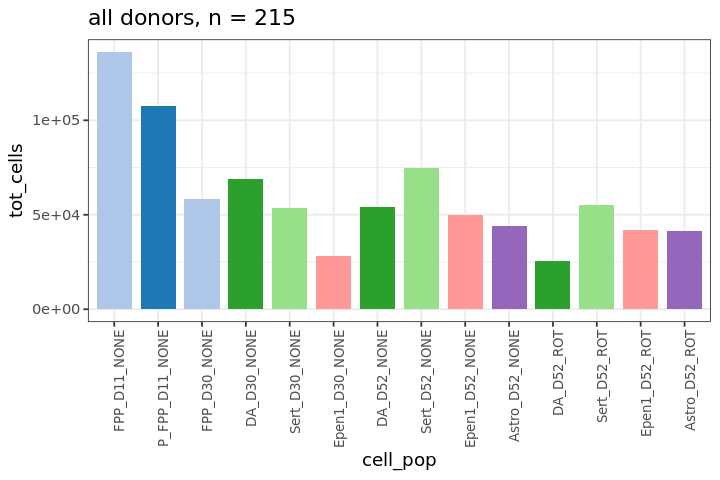

In [196]:
options(repr.plot.width=6, repr.plot.height=4)
df0 %>% ggplot(aes(x=cell_pop, y = tot_cells, fill = cell_pop)) + ggtitle("all iPSC lines, n = 215") + 
    geom_bar(stat = "identity", width = 0.8) + 
    scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + 
    theme(legend.position = "none",axis.text.x = element_text(angle = 90, hjust = 1, size = 8))

In [197]:
df1 = df[df$donor_id %in% bad_donors,] %>% 
    group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
df1$cell_pop = paste0(df1$celltype,"_",df1$time_point,"_",df1$treatment)
df1 = df1[df1$cell_pop %in% df0$cell_pop,]

In [198]:
df1 = df1 %>% mutate(cell_pop = factor(cell_pop, levels=c("FPP_D11_NONE","P_FPP_D11_NONE",
                                    "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                                   "DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                                    "DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")))

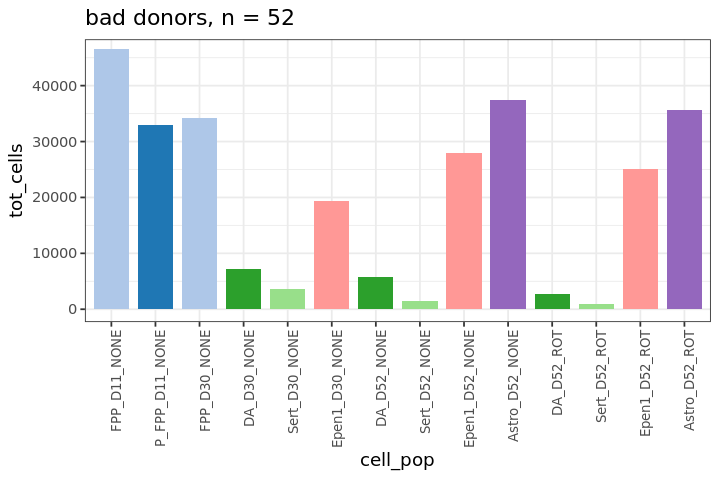

In [199]:
options(repr.plot.width=6, repr.plot.height=4)
df1 %>% ggplot(aes(x=cell_pop, y = tot_cells, fill = cell_pop)) + ggtitle("bad donors, n = 52") +
    geom_bar(stat = "identity", width = 0.8) + coord_cartesian(ylim = c(0, 46000)) +
    scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ 
    theme_bw() + theme(legend.position = "none",axis.text.x = element_text(angle = 90, hjust = 1, size = 8))

In [200]:
df2 = df[df$donor_id %in% good_donors,] %>% 
    group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
df2$cell_pop = paste0(df2$celltype,"_",df2$time_point,"_",df2$treatment)
df2 = df2[df2$cell_pop %in% df0$cell_pop,]

In [201]:
df2 = df2 %>% mutate(cell_pop = factor(cell_pop, levels=c("FPP_D11_NONE","P_FPP_D11_NONE",
                                    "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                                   "DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                                    "DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")))

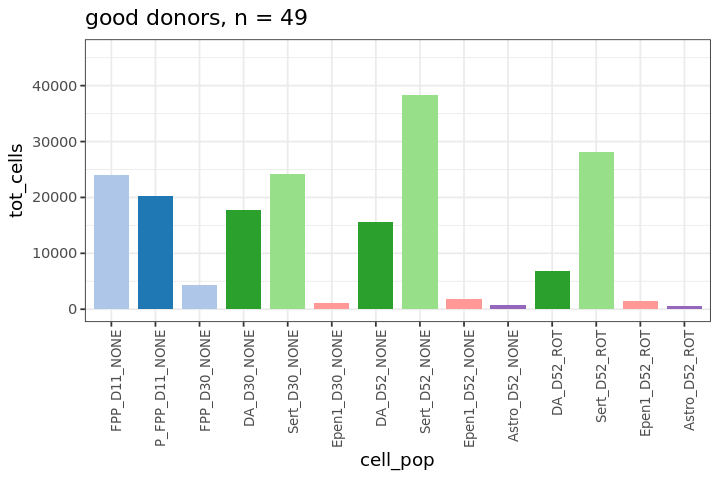

In [202]:
options(repr.plot.width=6, repr.plot.height=4)
df2 %>% ggplot(aes(x=cell_pop, y = tot_cells, fill = cell_pop)) + ggtitle("good donors, n = 49") + 
    geom_bar(stat = "identity", width = 0.8) + coord_cartesian(ylim = c(0, 46000)) +
    scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ 
    theme_bw() + theme(legend.position = "none",axis.text.x = element_text(angle = 90, hjust = 1, size = 8))

In [174]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable2_ncells_per_donor_pool_celltype_condition.csv")
df = read.csv(filename)
head(df)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE
HPSI0114i-eipl_1,pool1,D11,P_FPP,1217,NONE
HPSI0114i-kolf_2,pool12,D11,FPP,334,NONE
HPSI0114i-kolf_2,pool12,D11,NB,16,NONE
HPSI0114i-kolf_2,pool12,D11,P_FPP,190,NONE


In [175]:
df0 = df %>% group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
df0 = df0[df0$tot_cells >25000,]
df0$cell_pop = paste0(df0$celltype,"_",df0$time_point,"_",df0$treatment)

In [176]:
df0 = df0 %>% mutate(cell_pop = factor(cell_pop, levels=c("FPP_D11_NONE","P_FPP_D11_NONE",
                                    "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                                    "FPP_D52_NONE","DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                                    "FPP_D52_ROT","DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")))

In [177]:
length(unique(df$donor_id))

[1] 215

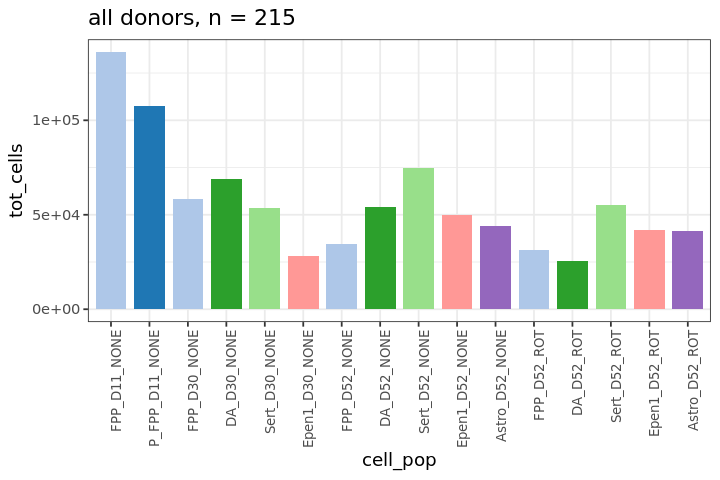

In [178]:
options(repr.plot.width=6, repr.plot.height=4)
df0 %>% ggplot(aes(x=cell_pop, y = tot_cells, fill = cell_pop)) + ggtitle("all donors, n = 215") + 
    geom_bar(stat = "identity", width = 0.8) + 
    scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_FPP,col_DA,col_Sert,col_Epen1,col_Astro,
                            col_FPP,col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + 
    theme(legend.position = "none",axis.text.x = element_text(angle = 90, hjust = 1, size = 8))

In [179]:
df1 = df[df$donor_id %in% bad_donors,] %>% 
    group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
df1$cell_pop = paste0(df1$celltype,"_",df1$time_point,"_",df1$treatment)
df1 = df1[df1$cell_pop %in% df0$cell_pop,]

In [180]:
df1 = df1 %>% mutate(cell_pop = factor(cell_pop, levels=c("FPP_D11_NONE","P_FPP_D11_NONE",
                                    "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                                    "FPP_D52_NONE","DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                                    "FPP_D52_ROT","DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")))

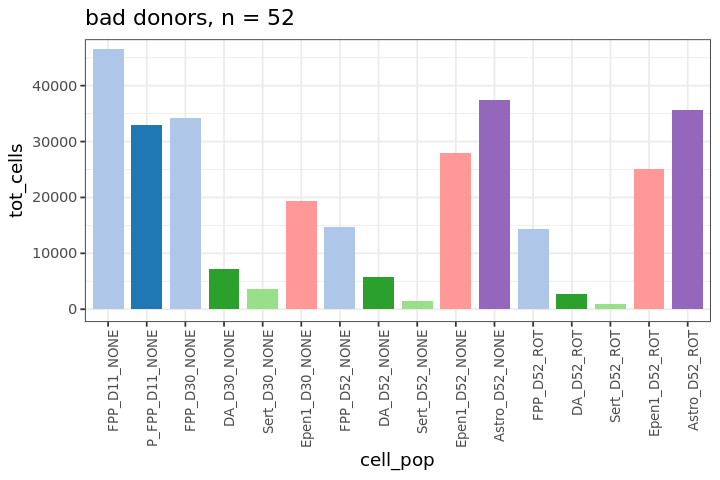

In [181]:
options(repr.plot.width=6, repr.plot.height=4)
df1 %>% ggplot(aes(x=cell_pop, y = tot_cells, fill = cell_pop)) + ggtitle("bad donors, n = 52") +
    geom_bar(stat = "identity", width = 0.8) + coord_cartesian(ylim = c(0, 46000)) +
    scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_FPP,col_DA,col_Sert,col_Epen1,col_Astro,
                            col_FPP,col_DA,col_Sert,col_Epen1,col_Astro))+ 
    theme_bw() + theme(legend.position = "none",axis.text.x = element_text(angle = 90, hjust = 1, size = 8))

In [182]:
df2 = df[df$donor_id %in% good_donors,] %>% 
    group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
df2$cell_pop = paste0(df2$celltype,"_",df2$time_point,"_",df2$treatment)
df2 = df2[df2$cell_pop %in% df0$cell_pop,]

In [183]:
df2 = df2 %>% mutate(cell_pop = factor(cell_pop, levels=c("FPP_D11_NONE","P_FPP_D11_NONE",
                                    "FPP_D30_NONE","DA_D30_NONE","Sert_D30_NONE","Epen1_D30_NONE",
                                    "FPP_D52_NONE","DA_D52_NONE","Sert_D52_NONE","Epen1_D52_NONE","Astro_D52_NONE",
                                    "FPP_D52_ROT","DA_D52_ROT","Sert_D52_ROT","Epen1_D52_ROT","Astro_D52_ROT")))

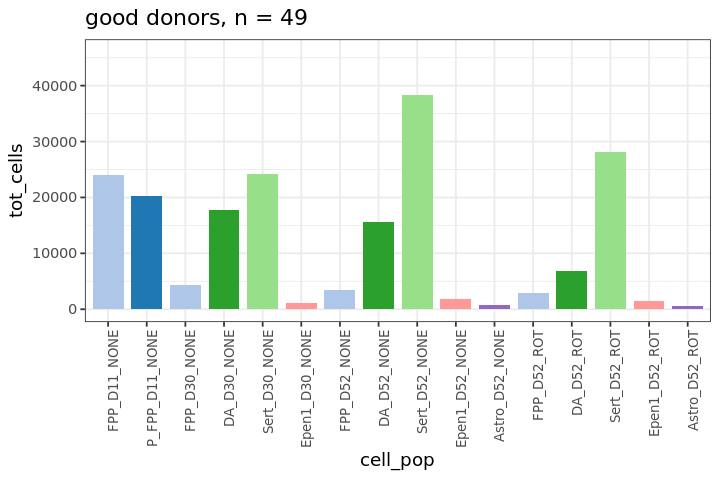

In [184]:
options(repr.plot.width=6, repr.plot.height=4)
df2 %>% ggplot(aes(x=cell_pop, y = tot_cells, fill = cell_pop)) + ggtitle("good donors, n = 49") + 
    geom_bar(stat = "identity", width = 0.8) + coord_cartesian(ylim = c(0, 46000)) +
    scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_FPP,col_DA,col_Sert,col_Epen1,col_Astro,
                            col_FPP,col_DA,col_Sert,col_Epen1,col_Astro))+ 
    theme_bw() + theme(legend.position = "none",axis.text.x = element_text(angle = 90, hjust = 1, size = 8))

In [40]:
## Define "main"/"most represented" cell types

In [41]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable2_ncells_per_donor_pool_celltype_condition.csv")
df = read.csv(filename)
head(df)

donor_id,pool_id,time_point,celltype,n_cells,treatment
HPSI0114i-eipl_1,pool1,D11,FPP,1672,NONE
HPSI0114i-eipl_1,pool1,D11,NB,228,NONE
HPSI0114i-eipl_1,pool1,D11,P_FPP,1217,NONE
HPSI0114i-kolf_2,pool12,D11,FPP,334,NONE
HPSI0114i-kolf_2,pool12,D11,NB,16,NONE
HPSI0114i-kolf_2,pool12,D11,P_FPP,190,NONE


In [ ]:
# numbers of cells

In [145]:
df2 = df %>% group_by(celltype,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))

In [171]:
n = 0.03

In [172]:
df3 = df2[df2$time_point == 'D11',]
df3$fract = df3$tot_cells/sum(df3$tot_cells)
df3[df3$fract > n,]

celltype,time_point,treatment,tot_cells,fract
FPP,D11,NONE,136074,0.5370332
NB,D11,NONE,9973,0.0393597
P_FPP,D11,NONE,107334,0.4236071


In [173]:
df3 = df2[df2$time_point == 'D30',]
df3$fract = df3$tot_cells/sum(df3$tot_cells)
df3[df3$fract > n,]

celltype,time_point,treatment,tot_cells,fract
DA,D30,NONE,69007,0.27501265
Epen1,D30,NONE,28145,0.11216588
FPP,D30,NONE,58109,0.23158100
P_FPP,D30,NONE,18988,0.07567262
Sert,D30,NONE,53774,0.21430479
U_Neur1,D30,NONE,21268,0.08475907


In [174]:
df3 = df2[df2$time_point == 'D52' & df2$treatment == 'NONE',]
df3$fract = df3$tot_cells/sum(df3$tot_cells)
df3[df3$fract > n,]

celltype,time_point,treatment,tot_cells,fract
Astro,D52,NONE,44059,0.14499961
DA,D52,NONE,54331,0.17880509
Epen1,D52,NONE,50084,0.16482808
FPP,D52,NONE,34515,0.11358999
P_FPP,D52,NONE,15390,0.05064899
Sert,D52,NONE,74984,0.24677479
U_Neur1,D52,NONE,22674,0.07462087


In [175]:
df3 = df2[df2$time_point == 'D52' & df2$treatment == 'ROT',]
df3$fract = df3$tot_cells/sum(df3$tot_cells)
df3[df3$fract > n,]

celltype,time_point,treatment,tot_cells,fract
Astro,D52,ROT,41392,0.18879939
DA,D52,ROT,25470,0.11617512
Epen1,D52,ROT,42063,0.19185999
FPP,D52,ROT,31203,0.14232478
P_FPP,D52,ROT,9741,0.04443117
Sert,D52,ROT,55225,0.25189520
U_Neur1,D52,ROT,8694,0.03965553


In [ ]:
# across cell lines

In [42]:
df2 = df %>% group_by(pool_id,donor_id) %>% summarize(tot_cells = sum(n_cells))
head(df2)
nrow(df2)

pool_id,donor_id,tot_cells
pool1,HPSI0114i-eipl_1,31643
pool1,HPSI0115i-paim_1,29425
pool1,HPSI0214i-eiwy_1,2505
pool1,HPSI0614i-liqa_1,7718
pool1,HPSI0714i-iudw_1,5079
pool1,HPSI0914i-suop_5,2642


[1] 252

In [43]:
df3 = df %>% group_by(celltype,donor_id,pool_id) %>% summarize(tot_cells = sum(n_cells))
head(df3)

celltype,donor_id,pool_id,tot_cells
Astro,HPSI0114i-bezi_3,pool10,6
Astro,HPSI0114i-eipl_1,pool1,13277
Astro,HPSI0114i-fikt_3,pool14,33
Astro,HPSI0114i-kolf_2,pool10,1
Astro,HPSI0114i-kolf_2,pool15,315
Astro,HPSI0114i-lexy_2,pool10,6


In [44]:
df4 = df3 %>% group_by(celltype) %>% summarise(n = n())
# df4 = df3[df3$tot_cells > 10,] %>% group_by(celltype) %>% summarise(n = n())
df4$fract = df4$n/nrow(df2)
df4

celltype,n,fract
Astro,214,0.8492063
DA,250,0.9920635
Epen1,245,0.9722222
Epen2,181,0.7182540
FPP,250,0.9920635
NB,169,0.6706349
P_FPP,243,0.9642857
P_Sert,154,0.6111111
Sert,249,0.9880952
U_Neur1,235,0.9325397


In [ ]:
## lines instead of lines and pools

In [117]:
df2 = df %>% group_by(donor_id) %>% summarize(tot_cells = sum(n_cells))
head(df2,2)
nrow(df2)

donor_id,tot_cells
HPSI0114i-bezi_3,681
HPSI0114i-eipl_1,31643


[1] 215

In [118]:
df3 = df %>% group_by(celltype,donor_id) %>% summarize(tot_cells = sum(n_cells))
head(df3)

celltype,donor_id,tot_cells
Astro,HPSI0114i-bezi_3,6
Astro,HPSI0114i-eipl_1,13277
Astro,HPSI0114i-fikt_3,33
Astro,HPSI0114i-kolf_2,316
Astro,HPSI0114i-lexy_2,24
Astro,HPSI0114i-posc_1,3


In [119]:
df4 = df3 %>% group_by(celltype) %>% summarise(n = n())
# df4 = df3[df3$tot_cells > 10,] %>% group_by(celltype) %>% summarise(n = n())
df4$fract = df4$n/nrow(df2)
df4

celltype,n,fract
Astro,185,0.8604651
DA,213,0.9906977
Epen1,209,0.9720930
Epen2,158,0.7348837
FPP,213,0.9906977
NB,151,0.7023256
P_FPP,207,0.9627907
P_Sert,136,0.6325581
Sert,212,0.9860465
U_Neur1,202,0.9395349


In [45]:
## split by condition

In [90]:
df2 = df %>% group_by(pool_id,donor_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df2)
c(nrow(df2[df2$time_point == 'D11',]),
nrow(df2[df2$time_point == 'D30',]),
nrow(df2[df2$time_point == 'D52' & df2$treatment == 'NONE',]),
nrow(df2[df2$time_point == 'D52' & df2$treatment == 'ROT',]))

pool_id,donor_id,time_point,treatment,tot_cells
pool1,HPSI0114i-eipl_1,D11,NONE,3117
pool1,HPSI0114i-eipl_1,D30,NONE,2591
pool1,HPSI0114i-eipl_1,D52,NONE,13236
pool1,HPSI0114i-eipl_1,D52,ROT,12699
pool1,HPSI0115i-paim_1,D11,NONE,4061
pool1,HPSI0115i-paim_1,D30,NONE,3918


[1] 202 201 232 231

In [91]:
## Day 11

In [120]:
df2 = df %>% group_by(pool_id,donor_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df2,2)
nrow(df2[df2$time_point == 'D11',])

pool_id,donor_id,time_point,treatment,tot_cells
pool1,HPSI0114i-eipl_1,D11,NONE,3117
pool1,HPSI0114i-eipl_1,D30,NONE,2591


[1] 202

In [121]:
df3 = df %>% group_by(celltype,donor_id,pool_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df3,2)

celltype,donor_id,pool_id,time_point,treatment,tot_cells
Astro,HPSI0114i-bezi_3,pool10,D52,NONE,2
Astro,HPSI0114i-bezi_3,pool10,D52,ROT,4


In [122]:
# df3 = df3[df3$tot_cells > 10,]

In [123]:
df4 = df3[df3$time_point == 'D11',] %>% group_by(celltype) %>% summarise(n = n())
df4$fract = df4$n/nrow(df2[df2$time_point == 'D11',])
df4

celltype,n,fract
FPP,202,1.0000000
NB,169,0.8366337
P_FPP,200,0.9900990


In [96]:
## Day 30

In [124]:
df2 = df %>% group_by(pool_id,donor_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df2,2)
nrow(df2[df2$time_point == 'D30',])

pool_id,donor_id,time_point,treatment,tot_cells
pool1,HPSI0114i-eipl_1,D11,NONE,3117
pool1,HPSI0114i-eipl_1,D30,NONE,2591


[1] 201

In [125]:
df3 = df %>% group_by(celltype,donor_id,pool_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df3)

celltype,donor_id,pool_id,time_point,treatment,tot_cells
Astro,HPSI0114i-bezi_3,pool10,D52,NONE,2
Astro,HPSI0114i-bezi_3,pool10,D52,ROT,4
Astro,HPSI0114i-eipl_1,pool1,D52,NONE,6151
Astro,HPSI0114i-eipl_1,pool1,D52,ROT,7126
Astro,HPSI0114i-fikt_3,pool14,D52,NONE,9
Astro,HPSI0114i-fikt_3,pool14,D52,ROT,24


In [126]:
# df3 = df3[df3$tot_cells > 10,]

In [127]:
df4 = df3[df3$time_point == 'D30',] %>% group_by(celltype) %>% summarise(n = n())
df4$fract = df4$n/nrow(df2[df2$time_point == 'D30',])
df4

celltype,n,fract
DA,200,0.9950249
Epen1,189,0.9402985
FPP,199,0.9900498
P_FPP,197,0.9800995
Sert,199,0.9900498
U_Neur1,186,0.9253731
U_Neur2,84,0.4179104


In [101]:
## Day 52 (untreated)

In [128]:
df2 = df %>% group_by(pool_id,donor_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df2,2)
nrow(df2[df2$time_point == 'D52' & df2$treatment == 'NONE',])

pool_id,donor_id,time_point,treatment,tot_cells
pool1,HPSI0114i-eipl_1,D11,NONE,3117
pool1,HPSI0114i-eipl_1,D30,NONE,2591


[1] 232

In [129]:
df3 = df %>% group_by(celltype,donor_id,pool_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df3,2)

celltype,donor_id,pool_id,time_point,treatment,tot_cells
Astro,HPSI0114i-bezi_3,pool10,D52,NONE,2
Astro,HPSI0114i-bezi_3,pool10,D52,ROT,4


In [130]:
# df3 = df3[df3$tot_cells > 10,]

In [131]:
df4 = df3[df3$time_point == 'D52' & df3$treatment == 'NONE',] %>% group_by(celltype) %>% summarise(n = n())
df4$fract = df4$n/nrow(df2[df2$time_point == 'D52' & df2$treatment == 'NONE',])
df4

celltype,n,fract
Astro,210,0.9051724
DA,229,0.9870690
Epen1,224,0.9655172
Epen2,167,0.7198276
FPP,224,0.9655172
P_FPP,203,0.8750000
P_Sert,145,0.6250000
Sert,220,0.9482759
U_Neur1,200,0.8620690
U_Neur3,209,0.9008621


In [85]:
## Day 52 (ROT treated)

In [134]:
df2 = df %>% group_by(pool_id,donor_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df2,2)
nrow(df2[df2$time_point == 'D52' & df2$treatment == 'ROT',])

pool_id,donor_id,time_point,treatment,tot_cells
pool1,HPSI0114i-eipl_1,D11,NONE,3117
pool1,HPSI0114i-eipl_1,D30,NONE,2591


[1] 231

In [135]:
df3 = df %>% group_by(celltype,donor_id,pool_id,time_point,treatment) %>% summarize(tot_cells = sum(n_cells))
head(df3,2)

celltype,donor_id,pool_id,time_point,treatment,tot_cells
Astro,HPSI0114i-bezi_3,pool10,D52,NONE,2
Astro,HPSI0114i-bezi_3,pool10,D52,ROT,4


In [136]:
# df3 = df3[df3$tot_cells > 10,]

In [137]:
df4 = df3[df3$time_point == 'D52' & df3$treatment == 'ROT',] %>% group_by(celltype) %>% summarise(n = n())
df4$fract = df4$n/nrow(df2[df2$time_point == 'D52' & df2$treatment == 'ROT',])
df4

celltype,n,fract
Astro,200,0.8658009
DA,218,0.9437229
Epen1,223,0.9653680
Epen2,143,0.6190476
FPP,224,0.9696970
P_FPP,184,0.7965368
P_Sert,103,0.4458874
Sert,221,0.9567100
U_Neur1,169,0.7316017
U_Neur3,195,0.8441558
